In [1]:
import torch
from PIL import Image
from torchvision.transforms import v2
from module.model_builder.model import Model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoints = torch.load("checkpoints2/pre3.pth.tar", map_location=device)
vocab = checkpoints['vocab']

# Create instance model
n_dim_model = 256
# --- Encoder Parameters ---
input_chanel_encoder = 3
hidden_dim_encoder = 256
n_head_encoder = 8
n_expansion_encoder = 8
n_layer_encoder = 6
# --- Decoder Parameters ---
n_head_decoder = 8
seq_length_decoder = 224
vocab_size_decoder = len(vocab)
n_expansion_decoder = 8
n_layer_decoder = 6
model = Model(n_dim_model, input_chanel_encoder, hidden_dim_encoder, n_head_encoder, n_expansion_encoder, n_layer_encoder,
              n_head_decoder, seq_length_decoder, vocab_size_decoder, n_expansion_decoder, n_layer_decoder).to(device)
model.load_state_dict(checkpoints['model_state_dict'])

<All keys matched successfully>

In [2]:
transform = v2.Compose([
    v2.PILToTensor(),
    v2.ToDtype(torch.float)
])

In [3]:
idx_start = vocab['<start>']
idx_end = vocab['<end>']

In [4]:
print(idx_start, idx_end)

1 2


In [5]:
import random

paths = []
true_labels = []
with open('D:/DATN_Handle/augment_labels.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()
    temp = random.sample([i for i in range(len(lines))], 50)
    for idx in temp:
        line = lines[idx]
        line = line.rstrip()
        image_path, label = line.split('--------')
        paths.append(image_path)
        true_labels.append(label)

Image path: image_774511.png
Predicted text: Bộ Quốc phòng Hàn Quốc
True text: Bộ Quốc phòng Hàn Quốc


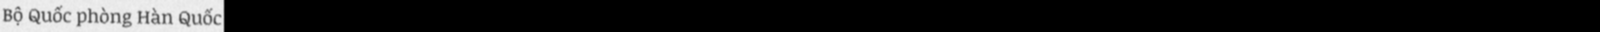

Image path: image_1483392.png
Predicted text: chủ tịch lưu thiếu kỳ cũng đặng tiểu bình đen và đế xuất cải cách kinh tế
True text: chủ tịch lưu thiếu kỳ cùng đặng tiểu bình đưa ra đề xuất cải cách kinh tế


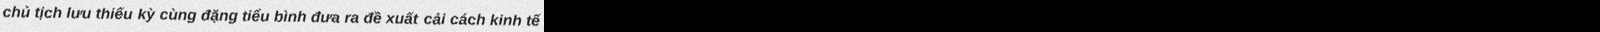

Image path: image_148630.png
Predicted text: 25 Tháng 10: Roger Milles
True text: 25 Tháng 10: Roger Miller


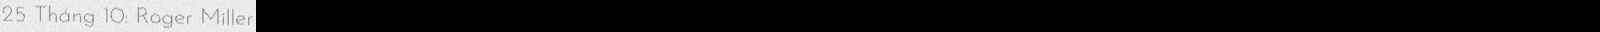

Image path: image_2685.png
Predicted text: 0-14 TUỔI: 200 (NAM 600 TCN)
True text: 0-14 TUỔI: 38% (NAM 469.754


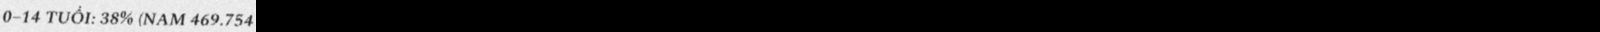

Image path: image_1583187.png
Predicted text: có mái lợp có cánh cửa đông mở
True text: có mái lợp và cánh cửa đóng mở


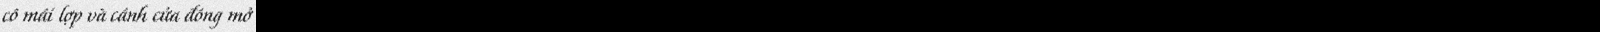

In [ ]:
v = list(vocab.keys())
model.eval()
with torch.no_grad():
    for t, path in enumerate(paths):
        import os
        image_path = os.path.join('D:/DATN_Handle/augment_data/', path) 
        labels = [idx_start]
        image = Image.open(image_path).convert("RGB")
        # Encoder
        input_encoder = transform(image)
        input_encoder = input_encoder.unsqueeze(0).to(device)
        for _ in range(seq_length_decoder):
            # Decoder
            input_decoder = torch.Tensor(labels).int()
            input_decoder = torch.unsqueeze(input_decoder, 0).to(device)
            output = model(input_encoder, input_decoder)
            idx = torch.argmax(output[:, -1, :])
            labels.append(idx.cpu().item())
            if idx.cpu().item() == idx_end:
                break
        print("Image path:", path)
        print("Predicted text:", ''.join([v[i] for i in labels[1:-1]]))
        print("True text:", true_labels[t])
        import IPython.display as ipd
        ipd.display(image)